## Assignment 01
For this assignment, we will analyze real estate evaluation dataset from
*Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
seed=0 # use this random seed throughout your code

### Question 1: Load and visualize the data (15 Points) 
Read the data file `Real_estate_valuation_dataset.csv`: 


In [2]:
# Load the data and take a sneak peek using "head" or "tail" method
data = pd.read_csv("Real_estate_valuation_dataset.csv")
data.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


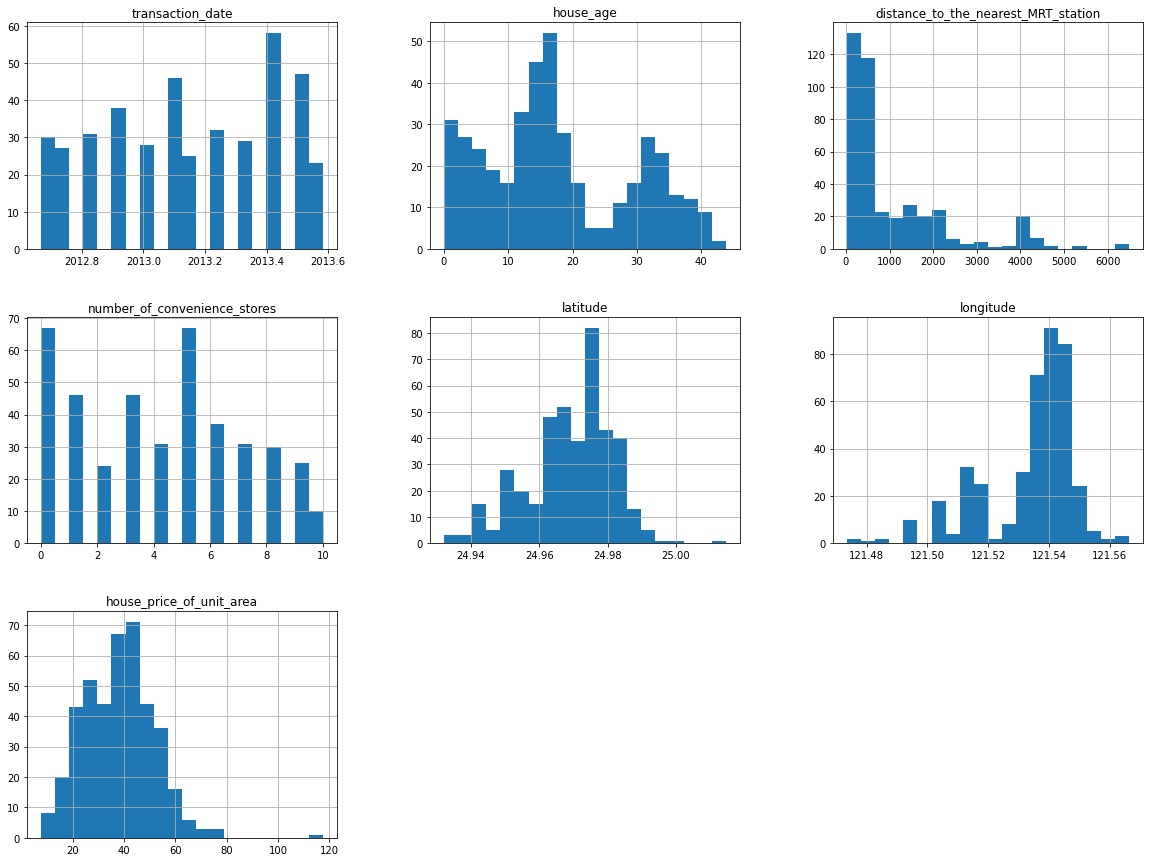

In [3]:
# Use "hist" to plot the distribution of the data, using an appropriate bin size:
data.hist(bins = 20, figsize = (20, 15))
plt.show()

In [4]:
# Compute the standard correlation coefficient between every pair of attributes:
corr_matrix = data.corr()
corr_matrix["house_price_of_unit_area"].sort_values(ascending = False)

house_price_of_unit_area               1.000000
number_of_convenience_stores           0.571005
latitude                               0.546307
longitude                              0.523287
transaction_date                       0.087491
house_age                             -0.210567
distance_to_the_nearest_MRT_station   -0.673613
Name: house_price_of_unit_area, dtype: float64

**Written Answer**: Explain how much each attribute correlates with house_price_of_unit_area?

**Answer**: The attributes with similarly ok correlations are 'number_of_convenience_stores', 'latitude', and 'longitude' with around 0.5.  The final one with a small positive correlation(nearly 0) is 'transaction_date' and the others 'house_age' and 'distance_to_the_nearest_MRT_station' have negative correlations meaning they don't influence the original attribute well.

### Question 2: Simple Linear Regression (30 points)
Let's first examine one feature `distance_to_the_nearest_MRT_station` to see if it can be used to predict `house_price_of_unit_area`:

In [5]:
# Read the corresponding column
y = data['house_price_of_unit_area']
x = data['distance_to_the_nearest_MRT_station']

# transform x into a design matrix
x = np.c_[x]

# Split the data into training and test set with 20% test size and random_state=seed
xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size = 0.2, random_state = seed)

Let's first use LinearRegression from sklearn:

In [6]:
# Because the values of features vary in magnitude, we often
# standardize features by removing the mean and scaling to unit
# variance using sklearn.preprocessing.StandardScaler

# Define the model
simpleLinReg = LinearRegression()

# Fit the model using the training set
simpleLinReg.fit(xtrain, ytrain)

# Obtain intercept and coefficient
intercept = simpleLinReg.intercept_
coefficient = simpleLinReg.coef_
print("Intercept is:", intercept.round(3))
print("Coefficient are:", coefficient.round(3))

# Obtain coefficient of determination (R-squared) on the training data
r2_train = r2_score(xtrain, ytrain)
print("Coefficient of determination on the training set: %.3f" % r2_train)

# Make predictions using the testing set
ypred = simpleLinReg.predict(xtest)

# Evaluate performance on the test data
r2_test = r2_score(xtest, ytest)
print("Coefficient of determination on the test set: %.3f" % r2_test)

Intercept is: 45.965
Coefficient are: [-0.007]
Coefficient of determination on the training set: -0.738
Coefficient of determination on the test set: -0.579


**Written Answer**: Based on the R-squared of training and test set, will it be better to use regularized regression?

**Answer**: The R-squared value of the training data was -0.738 and on the test set was -0.578, given these values it will be better to regularized regression since this model is obviously not fitting the data well according to the R2 values.

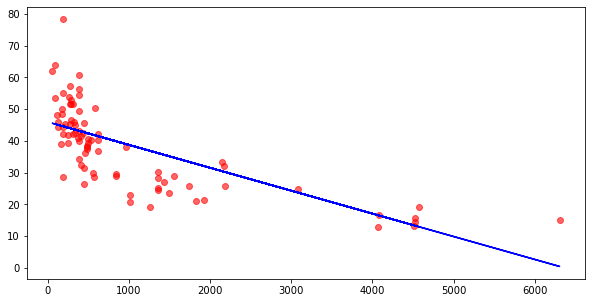

In [7]:
# Plot test data and predicted data
plt.figure(figsize = (10, 5))
plt.scatter(xtest, ytest, c = 'r', alpha = 0.6)
plt.plot(xtest, ypred, c = 'b')
plt.show()

In [8]:
# Define a function to plot learning curves based on R-squared:
def plot_learning_curves_R2(model, X, y):
    Xtrain, Xval, Ytrain, Yval = train_test_split(X, y, test_size = 0.2, random_state = 0)
    trainERR, valERR = [], []
    for i in range(1, len(Xtrain) + 1):
        #Model predictions
        model.fit(Xtrain[:i], Ytrain[:i])
        Ytrain_pred = model.predict(Xtrain[:i])
        Yval_pred = model.predict(Xval)
        trainERR.append(r2_score(Ytrain[:i], Ytrain_pred))
        valERR.append(r2_score(Yval, Yval_pred))
        
    #Plotting
    plt.plot(np.sqrt(trainERR), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(valERR), "b-", linewidth = 3, label = "val")
    plt.legend(loc = "upper right")
    plt.xlabel("Training set size")
    plt.ylabel("R2 Score")


C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\RYANH~1\AppData\Local\Temp/ipykernel_13924/4271377847.py:15: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(valERR), "b-", linewidth = 3, label = "val")


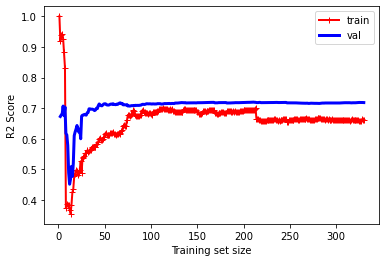

In [9]:
# Use the function defined above to plot the learning curves of your model
plot_learning_curves_R2(LinearRegression(), x, y)
plt.show()

**Written Answer**: Explain how do you interpret the learning curves you just plotted?

**Answer**: From the plot of the learning curves for this Linear Regression model, we can see that both the train and val curves are fairly similar with a sharp decrease at the beginning of the training set and then a sharp incline followed by a long flat section.  This shows us that the model we are using is likely underfitting the data in larger training sizes(flatline).  This also shows that the training dataset is likely unrepresentative and therefore creating issues within the curve.

### Question 3: Multivariate Linear Regression (30 Points)

We just used only one feature to predict house price. But sometimes using more features can better predict the target variable. 

Here, let's examine another two features: latitude and longitude. These two variables together give information about the location, that should be related to house price:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

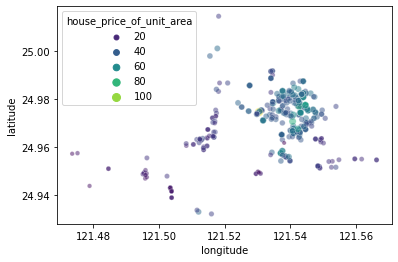

In [10]:
# Let's visualize it using sns scatterplot
sns.scatterplot(data=data, x="longitude", y="latitude",
                size="house_price_of_unit_area", hue="house_price_of_unit_area",
                palette="viridis", alpha=0.5)

In [11]:
# Read the corresponding column
y = data['house_price_of_unit_area']
longitude = data['longitude']
latitude = data['latitude']

# Create a design matrix
x = np.c_[(longitude, latitude)]

# Split the data into training and test set with 20% test size and random_state=seed
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = seed)

Let's use linear regression again:

In [12]:
# Define the model
linReg = LinearRegression()

# Fit the model using the training set
linReg.fit(xtrain, ytrain)

# Obtain intercept and coefficient
intercept = linReg.intercept_
coefficient = linReg.coef_
print("Intercept is:", intercept.round(3))
print("Coefficient are:", coefficient.round(3))

# Obtain coefficient of determination on the training data
r2_train = linReg.score(xtrain, ytrain)
print("Coefficient of determination on the training set: %.3f" % r2_train)

# Make predictions using the testing set
ypred = linReg.predict(xtest)

# Evaluate performance on the test data
r2_test = linReg.score(xtest, ytest)
print("Coefficient of determination on the test set: %.3f" % r2_test)

Intercept is: -49748.608
Coefficient are: [323.251 420.557]
Coefficient of determination on the training set: 0.396
Coefficient of determination on the test set: 0.445


Use the "plot_learning_curves" function to plot the learning curves of your model:

C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\RYANH~1\AppData\Local\Temp/ipykernel_13924/4271377847.py:15: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(valERR), "b-", linewidth = 3, label = "val")


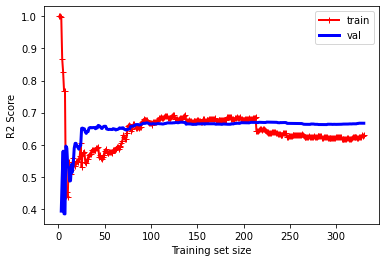

In [13]:
plot_learning_curves_R2(LinearRegression(), x, y)
plt.axis()
plt.show()

**Written Answer**: Compare this learning curve against the previous one. What insights you can derive by this comparison?

**Answer**: This learning curve shows a much closer val curve to the training curve but still has a long flatline for much of the training set size.  It is likely it is still underfitting the data.

Let's use stochastic gradient descent with initial learning rate of 0.01:

In [14]:
# Define the model
pipe = make_pipeline(StandardScaler(), SGDRegressor(eta0 = 0.1))

# Fit the model using the training set
pipe.fit(xtrain, ytrain.ravel())

# Obtain intercept and coefficient
intercept = pipe.named_steps['sgdregressor'].intercept_
coefficient = pipe.named_steps['sgdregressor'].coef_
print("Intercept is:", intercept.round(3))
print("Coefficient are:", coefficient.round(3))

# Obtain coefficient of determination on the training data
r2_train = pipe.score(xtrain, ytrain.ravel())
print("Coefficient of determination on the training set: %.3f" % r2_train)

# Make predictions using the testing set
ypred = pipe.predict(xtest)

# Evaluate performance on the test data
r2_test = pipe.score(xtest, ytest.ravel())
print("Coefficient of determination on the test set: %.3f" % r2_test)

Intercept is: [38.428]
Coefficient are: [5.833 6.544]
Coefficient of determination on the training set: 0.378
Coefficient of determination on the test set: 0.435


C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\RYANH~1\AppData\Local\Temp/ipykernel_13924/4271377847.py:15: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(valERR), "b-", linewidth = 3, label = "val")


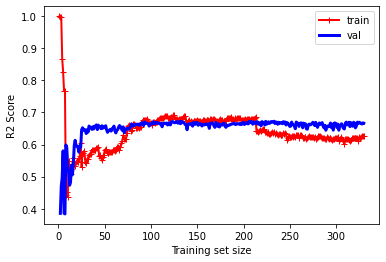

In [15]:
# Use the "plot_learning_curves" function to plot the learning curves of your model:
plot_learning_curves_R2(pipe, x, y)
plt.axis()
plt.show()

**Written Answer:** Compare the scores and learning curves of the SGD regression versus the linear regression. Are the learning curves similar or different and why? Also compare and explain why their values for Intercept and Coefficient are a little bit different?
(Hint: Check and compare default arguments and cost functions for both methods)


**Answer**: The scores between the SGD and linear regression are slightly higher in the SGD regression.  This is because of the default regularization of SGDRegressor (l2 penalty).  The Lines are much steeper in the beginning and seem to have better fitting for longer into the training set size as it only flatlines around 100.

### Question 4: Feature Selection (25 Points)
Now, let's use all available features to predict house price:

In [16]:
y = data['house_price_of_unit_area']
transaction = data['transaction_date']
age = data['house_age']
MRT = data['distance_to_the_nearest_MRT_station']
stores = data['number_of_convenience_stores']

# Create the design matrix
x = np.c_[transaction, age, MRT, stores, longitude, latitude]

# Split the data into training and test set with 20% test size and random_state=0
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

Let's use Ridge regression with alpha=0.01:

In [17]:
# Define the model
pipe2 = make_pipeline(StandardScaler(), Ridge(solver = "cholesky"))

# Fit the model using the training set
pipe2.fit(xtrain, ytrain)

# Obtain intercept and coefficient
intercept = pipe2.named_steps['ridge'].intercept_
coefficient = pipe2.named_steps['ridge'].coef_
print("Intercept is:", intercept.round(3))
print("Coefficient are:", coefficient.round(3))

# Obtain coefficient of determination on the training data
r2_train = pipe2.score(xtrain, ytrain)
print("Coefficient of determination on the training set: %.3f" % r2_train)

# Make predictions using the testing set
ypred = pipe2.predict(xtest)

# Evaluate performance on the test data
r2_test = pipe2.score(xtest, ytest)
print("Coefficient of determination on the test set: %.3f" % r2_test)

Intercept is: 37.976
Coefficient are: [ 1.404 -2.96  -5.552  3.174 -0.062  2.868]
Coefficient of determination on the training set: 0.565
Coefficient of determination on the test set: 0.657


In [18]:
# Using plot.barh to plot the value of coefficent
plt.barh(x = coefficient)

# Select coefficient expect for the first bias one
coefficient_feature = coefficient[0]

# Get the names of features
features_name = 'transaction'

# Plot
plt.barh(x = coefficient_feature)
plt.xlabel(features_name)

TypeError: barh() missing 2 required positional arguments: 'y' and 'width'

**Written Answer:** How do you interpret the result? How can it help you to select features to predict price? How does this result compare against the insights that you derived form the correlation matrix in Question 1?

C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\RYANH~1\AppData\Local\Temp/ipykernel_13924/4271377847.py:15: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(valERR), "b-", linewidth = 3, label = "val")


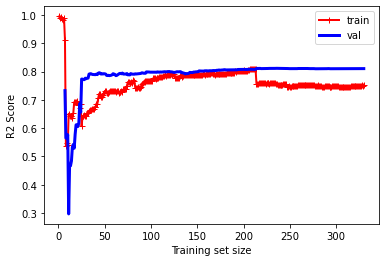

In [19]:
# Use the "plot_learning_curves" function to plot the learning curves of your model:
plot_learning_curves_R2(pipe2, x, y)
plt.axis()
plt.show()
#This one still runs

**Written Answer:** How this learning curve compares against the rest of the learning curves? Based on the learning curves, what model and size of training set would you choose as your final model?

**Answer**: This one is similar to the SGD learning curve.  Therefore I would most likely choose the SGD model since it performs decently well but I would reduce the training size as it seems like throughout the assignment the training size has been too large(lots of flatlining at the ends), maybe around 100-150 would be a better size.

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  You will submit to OWL only one file, which is your completed notebook (.ipynb file extension).